# 2022년 02월 기준 서울시 인구현환 분석
 - 모두의 데이터 분석(교재) 96page ~ 156page 참조 
### 1. pandas 모듈을 이용한 데이터 처리
### 2. matplotlib 모듈을 이용한 시각화


- 파일 읽어와 내용 확인하기
* 1000단위 콤마를 제거하기 위해 thounsands = "," 추가

In [2]:
import pandas as pd

# 나이별 데이터
age_df = pd.read_csv("202202_age.csv", encoding="cp949", header = 3, thousands = ",")
display(age_df)    # 데이터 확인
print(age_df.info())      # 전체 정보확인

,행정기관코드,행정기관,총 거주자수,연령구간인구수,0세,1세,2세,3세,4세,5세,...,91세.2,92세.2,93세.2,94세.2,95세.2,96세.2,97세.2,98세.2,99세.2,100세 이상.2
0,1100000000,서울특별시,9401518,9401518,42726,44489,47751,51006,54695,61652,...,5789,4905,3899,3037,2113,1389,958,807,608,947
1,1111000000,서울특별시 종로구,141433,141433,469,478,565,544,606,746,...,115,99,78,63,56,33,17,11,12,20
2,1111051500,서울특별시 종로구 청운효자동,11749,11749,46,46,58,56,61,77,...,6,8,6,4,3,3,1,1,1,2
3,1111053000,서울특별시 종로구 사직동,9087,9087,42,24,43,36,50,69,...,10,9,5,3,4,4,0,2,1,0
4,1111054000,서울특별시 종로구 삼청동,2376,2376,5,6,5,5,15,5,...,2,3,2,2,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3861,5013058000,제주특별자치도 서귀포시 서홍동,11156,11156,79,72,89,98,117,143,...,5,3,8,1,1,2,0,0,2,4
3862,5013059000,제주특별자치도 서귀포시 대륜동,15304,15304,105,125,168,140,154,182,...,14,8,7,7,3,4,0,4,4,5
3863,5013060000,제주특별자치도 서귀포시 대천동,13773,13773,84,104,135,117,182,202,...,13,8,8,7,4,2,1,1,1,3
3864,5013061000,제주특별자치도 서귀포시 중문동,11955,11955,65,71,89,82,72,89,...,12,9,7,5,2,4,1,2,0,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3866 entries, 0 to 3865
Columns: 311 entries, 행정기관코드 to 100세 이상.2
dtypes: int64(310), object(1)
memory usage: 9.2+ MB
None


불러온 데이터의 전체 정보 확인합니다.   
thousands="," 적용했을때와 적용하지 않았을때 
 * 적용시: 오브젝트1, int 310
 * 미적용: 오브젝트 303, int 8
 오브젝트(적용)는 "행정기관"을 의미

In [3]:
print(age_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3866 entries, 0 to 3865
Columns: 311 entries, 행정기관코드 to 100세 이상.2
dtypes: int64(310), object(1)
memory usage: 9.2+ MB
None


* 행정기관의 데이터 타입, 내용을 출력

In [4]:
print(type(age_df["행정기관"]))
print()
print(age_df.행정기관)

<class 'pandas.core.series.Series'>

0                서울특별시  
1             서울특별시 종로구 
2        서울특별시 종로구 청운효자동
3          서울특별시 종로구 사직동
4          서울특별시 종로구 삼청동
              ...       
3861    제주특별자치도 서귀포시 서홍동
3862    제주특별자치도 서귀포시 대륜동
3863    제주특별자치도 서귀포시 대천동
3864    제주특별자치도 서귀포시 중문동
3865    제주특별자치도 서귀포시 예래동
Name: 행정기관, Length: 3866, dtype: object


In [5]:
print(type(age_df[["행정기관"]]))
print()
age_df[["행정기관"]]

<class 'pandas.core.frame.DataFrame'>



,행정기관
0,서울특별시
1,서울특별시 종로구
2,서울특별시 종로구 청운효자동
3,서울특별시 종로구 사직동
4,서울특별시 종로구 삼청동
...,...
3861,제주특별자치도 서귀포시 서홍동
3862,제주특별자치도 서귀포시 대륜동
3863,제주특별자치도 서귀포시 대천동
3864,제주특별자치도 서귀포시 중문동


#### 데이터 검색
- 행정구역을 기준으로 검색
- 정확한 데이터 검색: "서울특별시"
- 글자에 포함된 데이터 검색: df['텍스트필드'].str.contains("포함문자")

In [6]:
# 서울특별시와 일치하는 데이터 검색
age_df[age_df["행정기관"] == "서울특별시 "]

,행정기관코드,행정기관,총 거주자수,연령구간인구수,0세,1세,2세,3세,4세,5세,...,91세.2,92세.2,93세.2,94세.2,95세.2,96세.2,97세.2,98세.2,99세.2,100세 이상.2


In [7]:
# 행정기관에서 "공릉2동"이 포함되어 있는 데이터 전체를 조회후 df1에 저장
df1 = age_df[age_df['행정기관'].str.contains("계룡시")]  # if "공릉2동" in row[1]:
df1

,행정기관코드,행정기관,총 거주자수,연령구간인구수,0세,1세,2세,3세,4세,5세,...,91세.2,92세.2,93세.2,94세.2,95세.2,96세.2,97세.2,98세.2,99세.2,100세 이상.2
2399,4425000000,충청남도 계룡시,43345,43345,167,241,234,324,353,449,...,29,24,20,18,12,6,1,4,6,1
2400,4425031000,충청남도 계룡시 두마면,8101,8101,38,37,50,64,60,76,...,11,6,4,3,4,5,0,1,1,1
2401,4425031500,충청남도 계룡시 엄사면,18208,18208,49,81,68,95,115,142,...,16,16,12,11,7,1,1,3,3,0
2402,4425033000,충청남도 계룡시 신도안면,8524,8524,57,81,87,101,116,158,...,0,0,0,0,0,0,0,0,0,0
2403,4425051000,충청남도 계룡시 금암동,8512,8512,23,42,29,64,62,73,...,2,2,4,4,1,0,0,0,2,0


df1에 데이터에서 행정기관을 index 값으로 지정

In [8]:
# df1.set_index(지정필드, drop = True(default) or False, inplace = False(default) or True)
df1 = df1.set_index("행정기관")
df1

,행정기관코드,총 거주자수,연령구간인구수,0세,1세,2세,3세,4세,5세,6세,...,91세.2,92세.2,93세.2,94세.2,95세.2,96세.2,97세.2,98세.2,99세.2,100세 이상.2
행정기관,,,,,,,,,,,,,,,,,,,,,
충청남도 계룡시,4425000000,43345,43345,167,241,234,324,353,449,460,...,29,24,20,18,12,6,1,4,6,1
충청남도 계룡시 두마면,4425031000,8101,8101,38,37,50,64,60,76,85,...,11,6,4,3,4,5,0,1,1,1
충청남도 계룡시 엄사면,4425031500,18208,18208,49,81,68,95,115,142,140,...,16,16,12,11,7,1,1,3,3,0
충청남도 계룡시 신도안면,4425033000,8524,8524,57,81,87,101,116,158,150,...,0,0,0,0,0,0,0,0,0,0
충청남도 계룡시 금암동,4425051000,8512,8512,23,42,29,64,62,73,85,...,2,2,4,4,1,0,0,0,2,0


##### 원하는 필드만 출력하기
- 선택하는 방법: 데이터를 출력하는 방법과 동일, 필요한 필드를 나열한다.
- 제외하는 방법: columns. difference([제외시킬 필드명])


In [9]:
# 원하는 데이터 추출
# df1([필드명, 필드명, 필드명, ...])
df1.iloc[:, [1, 3, 5, 6, 7, 8]]

,총 거주자수,0세,2세,3세,4세,5세
행정기관,,,,,,
충청남도 계룡시,43345,167,234,324,353,449
충청남도 계룡시 두마면,8101,38,50,64,60,76
충청남도 계룡시 엄사면,18208,49,68,95,115,142
충청남도 계룡시 신도안면,8524,57,87,101,116,158
충청남도 계룡시 금암동,8512,23,29,64,62,73


In [10]:
# 불필요한 데이터 제거
df1[df1.columns.difference(["행정기관코드", '총 거주자수', '연령구간인구수'])]

,0세,0세.1,0세.2,100세 이상,100세 이상.1,100세 이상.2,10세,10세.1,10세.2,11세,...,99세,99세.1,99세.2,9세,9세.1,9세.2,남 거주자수,여 거주자수,연령구간인구수.1,연령구간인구수.2
행정기관,,,,,,,,,,,,,,,,,,,,,
충청남도 계룡시,167,74,93,2,1,1,544,281,263,556,...,7,1,6,553,286,267,21612,21733,21612,21733
충청남도 계룡시 두마면,38,14,24,1,0,1,98,51,47,85,...,1,0,1,99,53,46,3987,4114,3987,4114
충청남도 계룡시 엄사면,49,18,31,1,1,0,170,85,85,194,...,4,1,3,159,84,75,8899,9309,8899,9309
충청남도 계룡시 신도안면,57,31,26,0,0,0,166,93,73,182,...,0,0,0,173,89,84,4444,4080,4444,4080
충청남도 계룡시 금암동,23,11,12,0,0,0,110,52,58,95,...,2,0,2,122,60,62,4282,4230,4282,4230


In [11]:
df1.columns

Index(['행정기관코드', '총 거주자수', '연령구간인구수', '0세', '1세', '2세', '3세', '4세', '5세', '6세',
       ...
       '91세.2', '92세.2', '93세.2', '94세.2', '95세.2', '96세.2', '97세.2', '98세.2',
       '99세.2', '100세 이상.2'],
      dtype='object', length=310)

In [12]:
# 0세부터 100세이상 데이터만 출력(남여 공통)
df1_mf = df1.iloc[:, 3:104] 
df1_mf

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,...,91세,92세,93세,94세,95세,96세,97세,98세,99세,100세 이상
행정기관,,,,,,,,,,,,,,,,,,,,,
충청남도 계룡시,167,241,234,324,353,449,460,468,502,553,...,40,28,25,22,14,9,1,4,7,2
충청남도 계룡시 두마면,38,37,50,64,60,76,85,76,88,99,...,14,7,4,3,4,5,0,1,1,1
충청남도 계룡시 엄사면,49,81,68,95,115,142,140,142,157,159,...,23,18,16,13,9,2,1,3,4,1
충청남도 계룡시 신도안면,57,81,87,101,116,158,150,166,162,173,...,0,0,0,0,0,0,0,0,0,0
충청남도 계룡시 금암동,23,42,29,64,62,73,85,84,95,122,...,3,3,5,6,1,2,0,0,2,0


#### df1_mf 데이터를 이용해 차트 작성


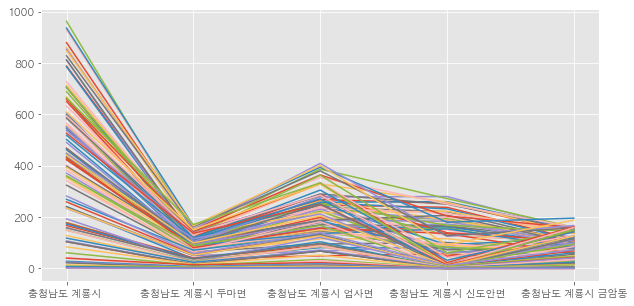

In [14]:
import matplotlib.pyplot as plt
import platform

if platform.system() == "Darwin":  # 맥
    plt.rc('font', family='AppleGothic')
elif platform.system() == "Windows":  # 윈도우
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == "Linux":  # 리눅스 = 코랩
    plt.rc('font', family='Malgun Gothic')

plt.style.use("ggplot")
plt.figure(figsize = (10, 5))
plt.plot(df1_mf)

plt.show()

기본출력: 행정기관 => x 축, 0세 ~ 100이상 필드 1개가 데이터 1개   
x축에 열이름, 출력값에 행정기관 1개의 데이터   
모두의 데이터 분석 교재(109 ~ 114 page) 참조

In [15]:
# x축
df1_mf.columns

Index(['0세', '1세', '2세', '3세', '4세', '5세', '6세', '7세', '8세', '9세',
       ...
       '91세', '92세', '93세', '94세', '95세', '96세', '97세', '98세', '99세',
       '100세 이상'],
      dtype='object', length=101)

In [16]:
# 값축
df1_mf.iloc[0]

0세         167
1세         241
2세         234
3세         324
4세         353
          ... 
96세          9
97세          1
98세          4
99세          7
100세 이상      2
Name: 충청남도 계룡시 , Length: 101, dtype: int64

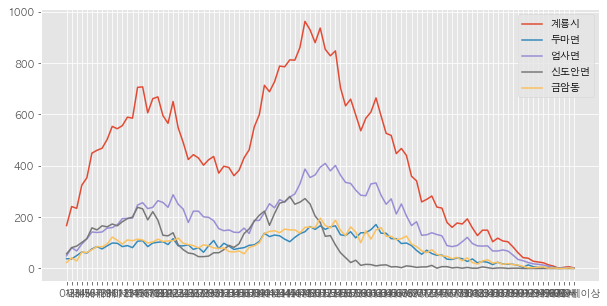

In [17]:
# 차트 작성

plt.figure(figsize=(10,5))

plt.plot(df1_mf.columns, df1_mf.iloc[0], label = "계룡시")
plt.plot(df1_mf.columns, df1_mf.iloc[1], label = "두마면")
plt.plot(df1_mf.columns, df1_mf.iloc[2], label = "엄사면")
plt.plot(df1_mf.columns, df1_mf.iloc[3], label = "신도안면")
plt.plot(df1_mf.columns, df1_mf.iloc[4], label = "금암동")

plt.legend()    # 범례표시

plt.show()

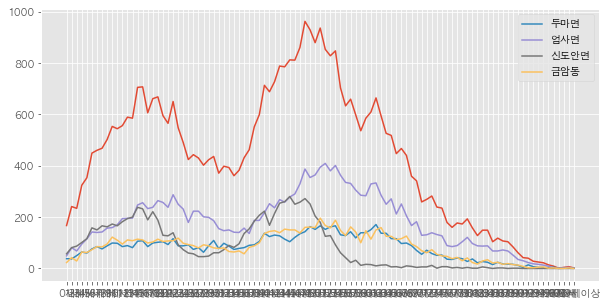

In [18]:
# 차트 작성

plt.figure(figsize=(10,5))

for i in range(len(df1_mf)):
    plt.plot(df1_mf.columns, df1_mf.iloc[i], label = df1_mf.index[i].split(" ")[-1])


plt.legend()    # 범례표시

plt.show()

bar 차트

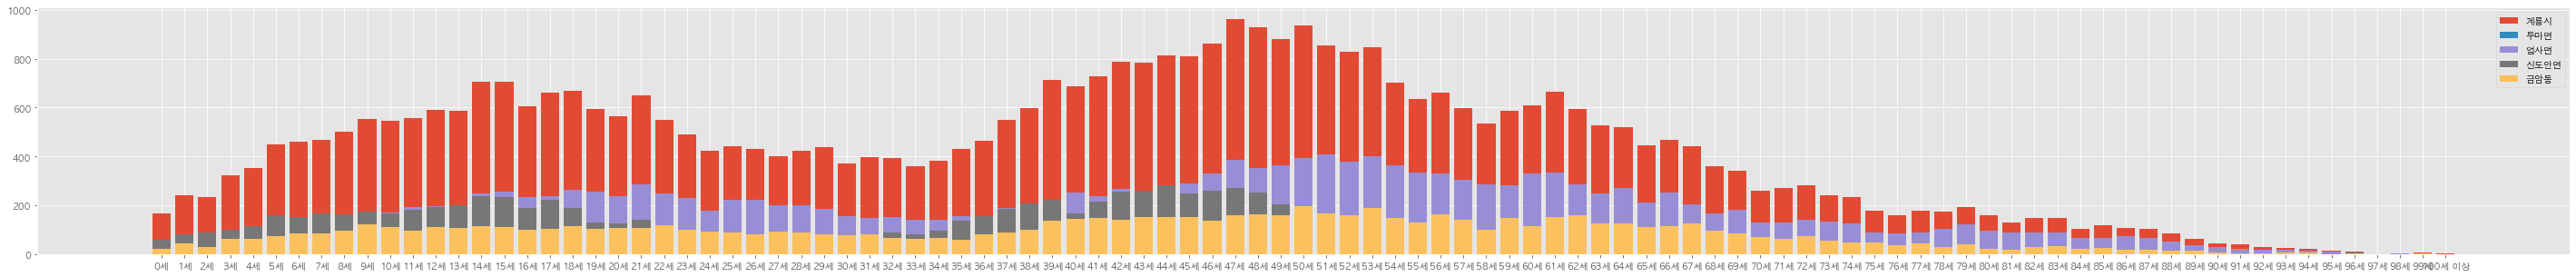

In [19]:
# 차트 작성

plt.figure(figsize=(50,5))

for i in df1_mf.index:
    # index에서 범례 출력값 추출하기
    if i.split(" ")[-1] == "":
        lab = i.split(" ")[-2]
    else:
        lab = i.split(" ")[-1]

    plt.bar(df1_mf.columns, df1_mf.loc[i], label = lab)


plt.legend()    # 범례표시

plt.show()

barh 차트

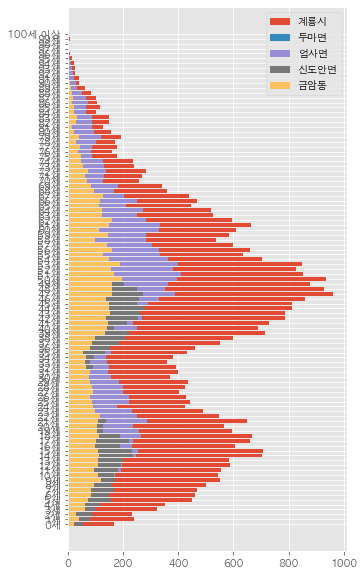

In [20]:
# 차트 작성

plt.figure(figsize=(5,10))

for i in df1_mf.index:
  # index에서 범례 출력값 추출하기
    if i.split(" ")[-1] == "":
        lab = i.split(" ")[-2]
    else:
        lab = i.split(" ")[-1]

    plt.barh(df1_mf.columns, df1_mf.loc[i], label = lab)


plt.legend()    # 범례표시

plt.show()

In [21]:
df1.columns

Index(['행정기관코드', '총 거주자수', '연령구간인구수', '0세', '1세', '2세', '3세', '4세', '5세', '6세',
       ...
       '91세.2', '92세.2', '93세.2', '94세.2', '95세.2', '96세.2', '97세.2', '98세.2',
       '99세.2', '100세 이상.2'],
      dtype='object', length=310)

In [22]:
df1[df1.columns.difference(["행정기관", '총 거주자수', '연령구간인구수'])]

,0세,0세.1,0세.2,100세 이상,100세 이상.1,100세 이상.2,10세,10세.1,10세.2,11세,...,99세.1,99세.2,9세,9세.1,9세.2,남 거주자수,여 거주자수,연령구간인구수.1,연령구간인구수.2,행정기관코드
행정기관,,,,,,,,,,,,,,,,,,,,,
충청남도 계룡시,167,74,93,2,1,1,544,281,263,556,...,1,6,553,286,267,21612,21733,21612,21733,4425000000
충청남도 계룡시 두마면,38,14,24,1,0,1,98,51,47,85,...,0,1,99,53,46,3987,4114,3987,4114,4425031000
충청남도 계룡시 엄사면,49,18,31,1,1,0,170,85,85,194,...,1,3,159,84,75,8899,9309,8899,9309,4425031500
충청남도 계룡시 신도안면,57,31,26,0,0,0,166,93,73,182,...,0,0,173,89,84,4444,4080,4444,4080,4425033000
충청남도 계룡시 금암동,23,11,12,0,0,0,110,52,58,95,...,0,2,122,60,62,4282,4230,4282,4230,4425051000


In [23]:
df1_mf.T

행정기관,충청남도 계룡시,충청남도 계룡시 두마면,충청남도 계룡시 엄사면,충청남도 계룡시 신도안면,충청남도 계룡시 금암동
0세,167,38,49,57,23
1세,241,37,81,81,42
2세,234,50,68,87,29
3세,324,64,95,101,64
4세,353,60,115,116,62
...,...,...,...,...,...
96세,9,5,2,0,2
97세,1,0,1,0,0
98세,4,1,3,0,0
99세,7,1,4,0,2


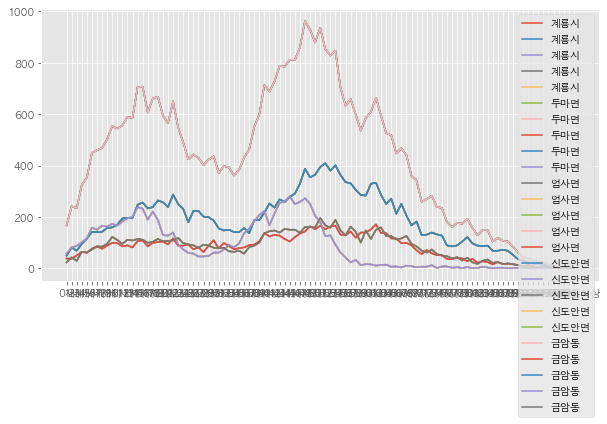

In [24]:
plt.figure(figsize=(10,5))

for i in df1_mf.T.columns:
    # index에서 범례 출력값 추출하기
    if i.split(" ")[-1] == "":
        lab=i.split(" ")[-2]
    else:
        lab=i.split(" ")[-1]

    # 차트에 index 값을 이용해 차트 출력
    plt.plot(df1_mf.T, label=lab )

plt.legend()

plt.show()


#### 남자/여자 데이터가져오기
- df1에서 남자 데이터(df_m)/여자 데이터(df_f) 추출해 저장하기


In [25]:
df1.columns

Index(['행정기관코드', '총 거주자수', '연령구간인구수', '0세', '1세', '2세', '3세', '4세', '5세', '6세',
       ...
       '91세.2', '92세.2', '93세.2', '94세.2', '95세.2', '96세.2', '97세.2', '98세.2',
       '99세.2', '100세 이상.2'],
      dtype='object', length=310)

In [26]:
list(df1.columns).index("100세 이상.2")
# 0세부터 100세이상 데이터만 출력(남여 공통)
df1_m = df1.iloc[:, 106:207] 
df1_f = df1.iloc[:, 209:310]

df1_m_T = df1_m.T
df1_f_T = df1_f.T

- 남/여 인원수를 하나의 그래프에 출력하시오
- 그래프는 가로 막대형
- 특정 지역의 1개의 그래프 (가로막대)
- 전체 세대별 인원에 대한 그래프 (가로막대)

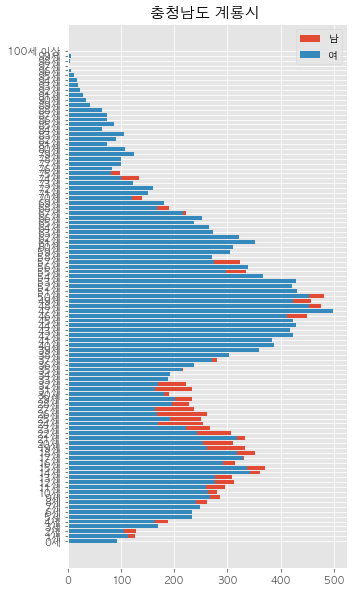

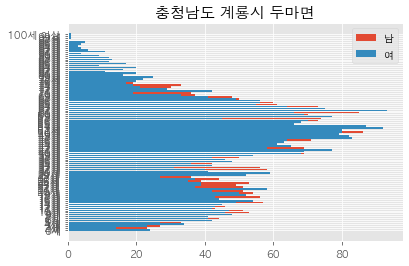

In [27]:
plt.figure(figsize=(5,10))

plt.barh(df1_mf.columns, df1_m.iloc[0], label = "남")
plt.barh(df1_mf.columns, df1_f.iloc[0], label = "여")
plt.title(df1_mf.index[0], size = 15)
plt.legend()
plt.show()


plt.barh(df1_mf.columns, df1_m.iloc[1], label = "남")
plt.barh(df1_mf.columns, df1_f.iloc[1], label = "여")
plt.title(df1_mf.index[1], size = 15)
plt.legend()


plt.show()


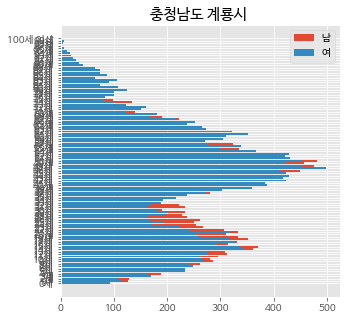

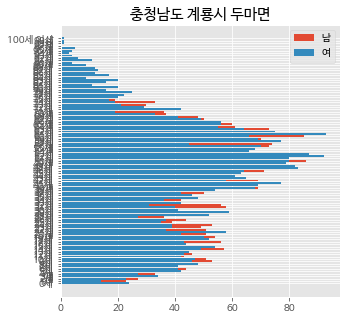

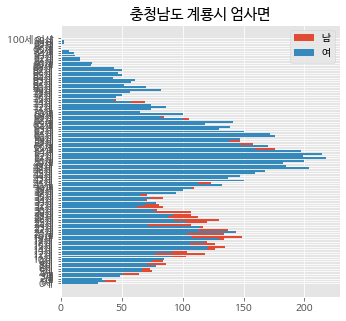

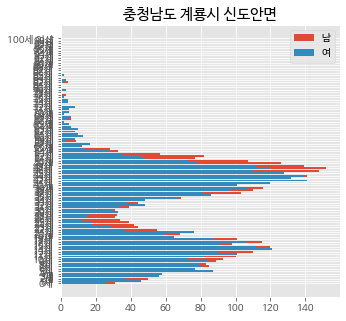

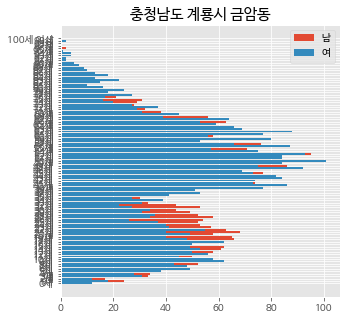

In [ ]:
# 5개 동시에 출력
for i in range(len(df1_m)):
  plt.figure(figsize=(5,5))

  plt.barh(df1_mf.columns, df1_m.iloc[i], label = "남")
  plt.barh(df1_mf.columns, df1_f.iloc[i], label = "여")
  plt.title(df1_m.index[i], size = 15)
  plt.legend()
  plt.show()



- 남은 왼쪽, 여는 오른쪽으로 출력되는 차트
  남자 데이터를 음수로 변경

[-74, -127, -128, -154, -189, -215, -226, -220, -261, -286]
[-74, -127, -128, -154, -189, -215, -226, -220, -261, -286]


/Users/wondongchan/opt/anaconda3/envs/kdig/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


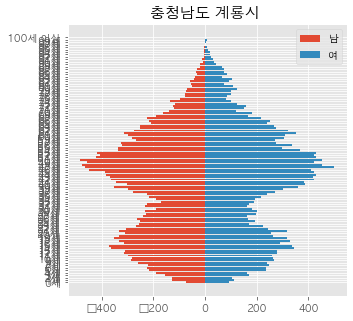

In [28]:
val = []
for i in df1_m.iloc[0]:
    val.append(-i)

print(val[:10])

plt.figure(figsize=(5,5))

plt.barh(df1_mf.columns, val, label = "남")
plt.barh(df1_mf.columns, df1_f.iloc[0], label = "여")
plt.title(df1_m.index[0], size = 15)
plt.legend()

print(val[:10])

/Users/wondongchan/opt/anaconda3/envs/kdig/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


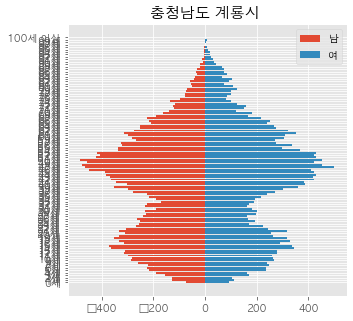

/Users/wondongchan/opt/anaconda3/envs/kdig/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


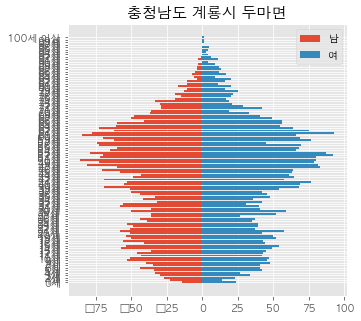

/Users/wondongchan/opt/anaconda3/envs/kdig/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


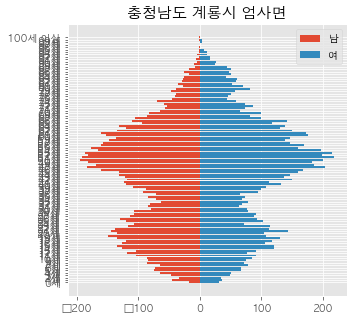

/Users/wondongchan/opt/anaconda3/envs/kdig/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


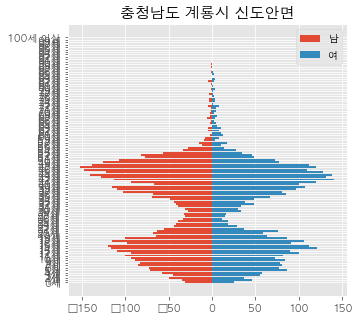

/Users/wondongchan/opt/anaconda3/envs/kdig/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


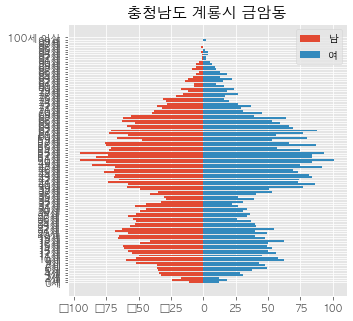

In [29]:
def colVal(df_data):
    val = [-i for i in df_data]
    return val

# def colVal(df_data):
#   for i in df1_m.iloc[0]:
#     val.append(-i)

#   print(val[:10])

for i in range(len(df1_m)):
    plt.figure(figsize=(5,5))

    plt.barh(df1_mf.columns, colVal(df1_m.iloc[i]), label = "남")
    plt.barh(df1_mf.columns, df1_f.iloc[i], label = "여")
    plt.title(df1_m.index[i], size = 15)
    plt.legend()
    plt.show()


- lambda: 간단한 함수식을 정의할 때 사용

In [30]:
def aa(x, y):
    return x + y

aa(10,12)

22

In [31]:
(lambda x, y: x + y)(10, 12)


22

In [32]:
(lambda x : -x)(10)

-10

/Users/wondongchan/opt/anaconda3/envs/kdig/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


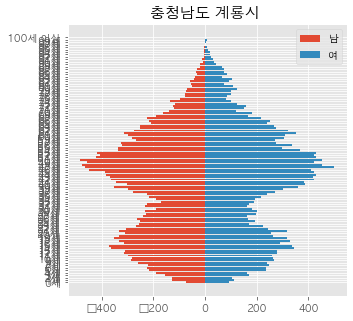

/Users/wondongchan/opt/anaconda3/envs/kdig/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


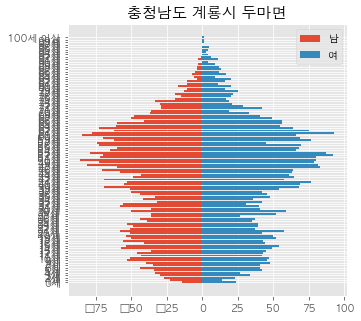

/Users/wondongchan/opt/anaconda3/envs/kdig/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


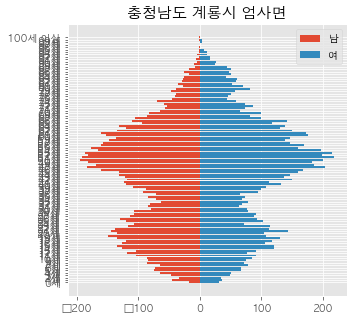

/Users/wondongchan/opt/anaconda3/envs/kdig/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


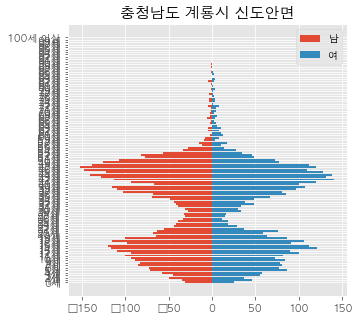

/Users/wondongchan/opt/anaconda3/envs/kdig/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


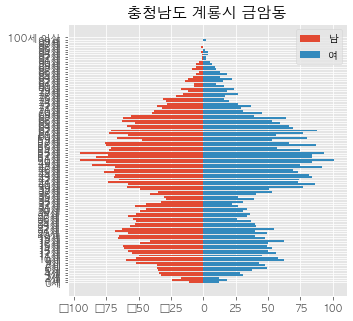

In [33]:
for i in range(len(df1_m)):
    plt.figure(figsize=(5,5))

    plt.barh(df1_mf.columns, df1_m.apply(lambda x: -x).iloc[i], label = "남")
    plt.barh(df1_mf.columns, df1_f.iloc[i], label = "여")
    plt.title(df1_m.index[i], size = 15)
    plt.legend()
    plt.show()

/Users/wondongchan/opt/anaconda3/envs/kdig/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


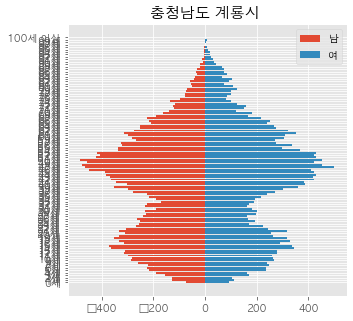

In [34]:
plt.figure(figsize=(5, 5))

plt.barh(df1_mf.columns, df1_m.apply(lambda x: -x).iloc[0], label="남" )
plt.barh(df1_mf.columns, df1_f.iloc[0], label="여" )
plt.title(df1_m.index[0], size=15)
plt.legend()
plt.show()


In [35]:
df1_m.columns
df1_f.columns

Index(['0세.2', '1세.2', '2세.2', '3세.2', '4세.2', '5세.2', '6세.2', '7세.2', '8세.2',
       '9세.2',
       ...
       '91세.2', '92세.2', '93세.2', '94세.2', '95세.2', '96세.2', '97세.2', '98세.2',
       '99세.2', '100세 이상.2'],
      dtype='object', length=101)

In [36]:
# columns 값을 0 ~ 데이터 갯수 만큼의 숫자로 변경
df1_m.columns = range(len(df1_m.columns))
df1_f.columns = range(len(df1_f.columns))

df1_m.columns
list(df1_f.columns)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100]

/Users/wondongchan/opt/anaconda3/envs/kdig/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


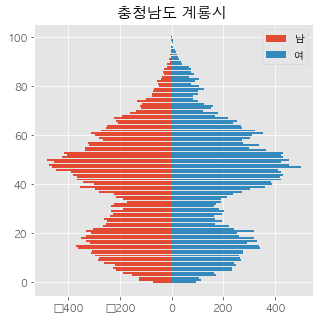

In [37]:
# 위에서 변경한 columns를 이용해 차트 작성
plt.figure(figsize=(5, 5))

plt.barh(df1_m.columns, df1_m.apply(lambda x: -x).iloc[0], label="남" )
plt.barh(df1_m.columns, df1_f.iloc[0], label="여" )
plt.title(df1_m.index[0], size=15)
plt.legend()
plt.show()

- 전체 세대별 인원에 대한 그래프(가로막대)


In [38]:
print(df1_m.sum()[0]) # 열 기준 합계, 계룡시의 남자 데이터의 세대별 합계
df1_m[[0]]

148


,0
행정기관,
충청남도 계룡시,74
충청남도 계룡시 두마면,14
충청남도 계룡시 엄사면,18
충청남도 계룡시 신도안면,31
충청남도 계룡시 금암동,11


In [39]:
df1_m.sum(axis = 1)   # 행단위 합계 계산

행정기관
충청남도 계룡시         21612
충청남도 계룡시 두마면      3987
충청남도 계룡시 엄사면      8899
충청남도 계룡시 신도안면     4444
충청남도 계룡시 금암동      4282
dtype: int64

인구 구조를 나타내는 파이 차트 작성

In [40]:
mf_size = [df1_m.iloc[0].sum(), df1_f.iloc[0].sum()]
mf_size

[21612, 21733]

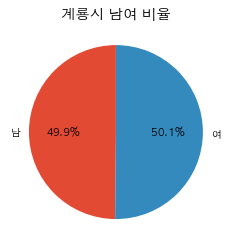

In [49]:
from pandas.core import frame

import matplotlib.pyplot as plt
import platform

if platform.system() == "Darwin":  # 맥
    plt.rc('font', family='AppleGothic')
elif platform.system() == "Windows":  # 윈도우
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == "Linux":  # 리눅스 = 코랩
    plt.rc('font', family='Malgun Gothic')

plt.figure()
plt.pie(mf_size,
        labels=["남", "여"], 
        autopct = "%.1f%%",
        startangle = 90)
plt.title("계룡시 남여 비율")
plt.show()

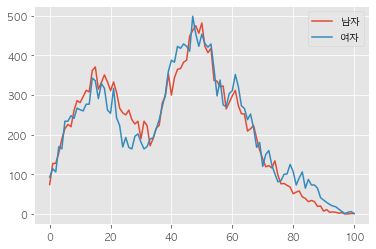

In [43]:
plt.figure()

plt.plot(df1_m.columns, df1_m.iloc[0], label = "남자")
plt.plot(df1_f.columns, df1_f.iloc[0], label = "여자")

plt.legend()
plt.show()

#### 세대별 차이

In [44]:
## 세대별 남녀의 인구수 차이를 출력

mf_sub=df1_m - df1_f
mf_sub

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
행정기관,,,,,,,,,,,,,,,,,,,,,
충청남도 계룡시,-19,13,22,-16,25,-19,-8,-28,20,19,...,-18,-20,-15,-14,-10,-3,-1,-4,-5,0
충청남도 계룡시 두마면,-10,9,4,-4,6,-8,3,-6,-8,7,...,-8,-5,-4,-3,-4,-5,0,-1,-1,-1
충청남도 계룡시 엄사면,-13,9,0,-3,13,8,6,-14,15,9,...,-9,-14,-8,-9,-5,0,-1,-3,-2,1
충청남도 계룡시 신도안면,5,-11,13,-11,0,-16,-4,4,4,5,...,0,0,0,0,0,0,0,0,0,0
충청남도 계룡시 금암동,-1,6,5,2,6,-3,-13,-12,9,-2,...,-1,-1,-3,-2,-1,2,0,0,-2,0


/Users/wondongchan/opt/anaconda3/envs/kdig/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


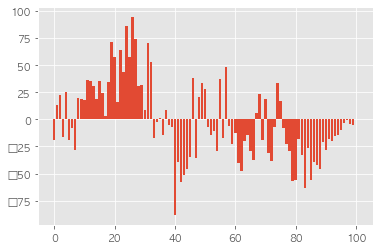

In [45]:
plt.figure()      ## 세대별 남녀의 차이를 그래프로 그려보자
plt.bar(mf_sub.columns, mf_sub.iloc[0])
plt.show()

##### 산점도 차트

/var/folders/rt/5jvyxhl160n0wkcqnqvygf8m0000gn/T/ipykernel_28208/698104730.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


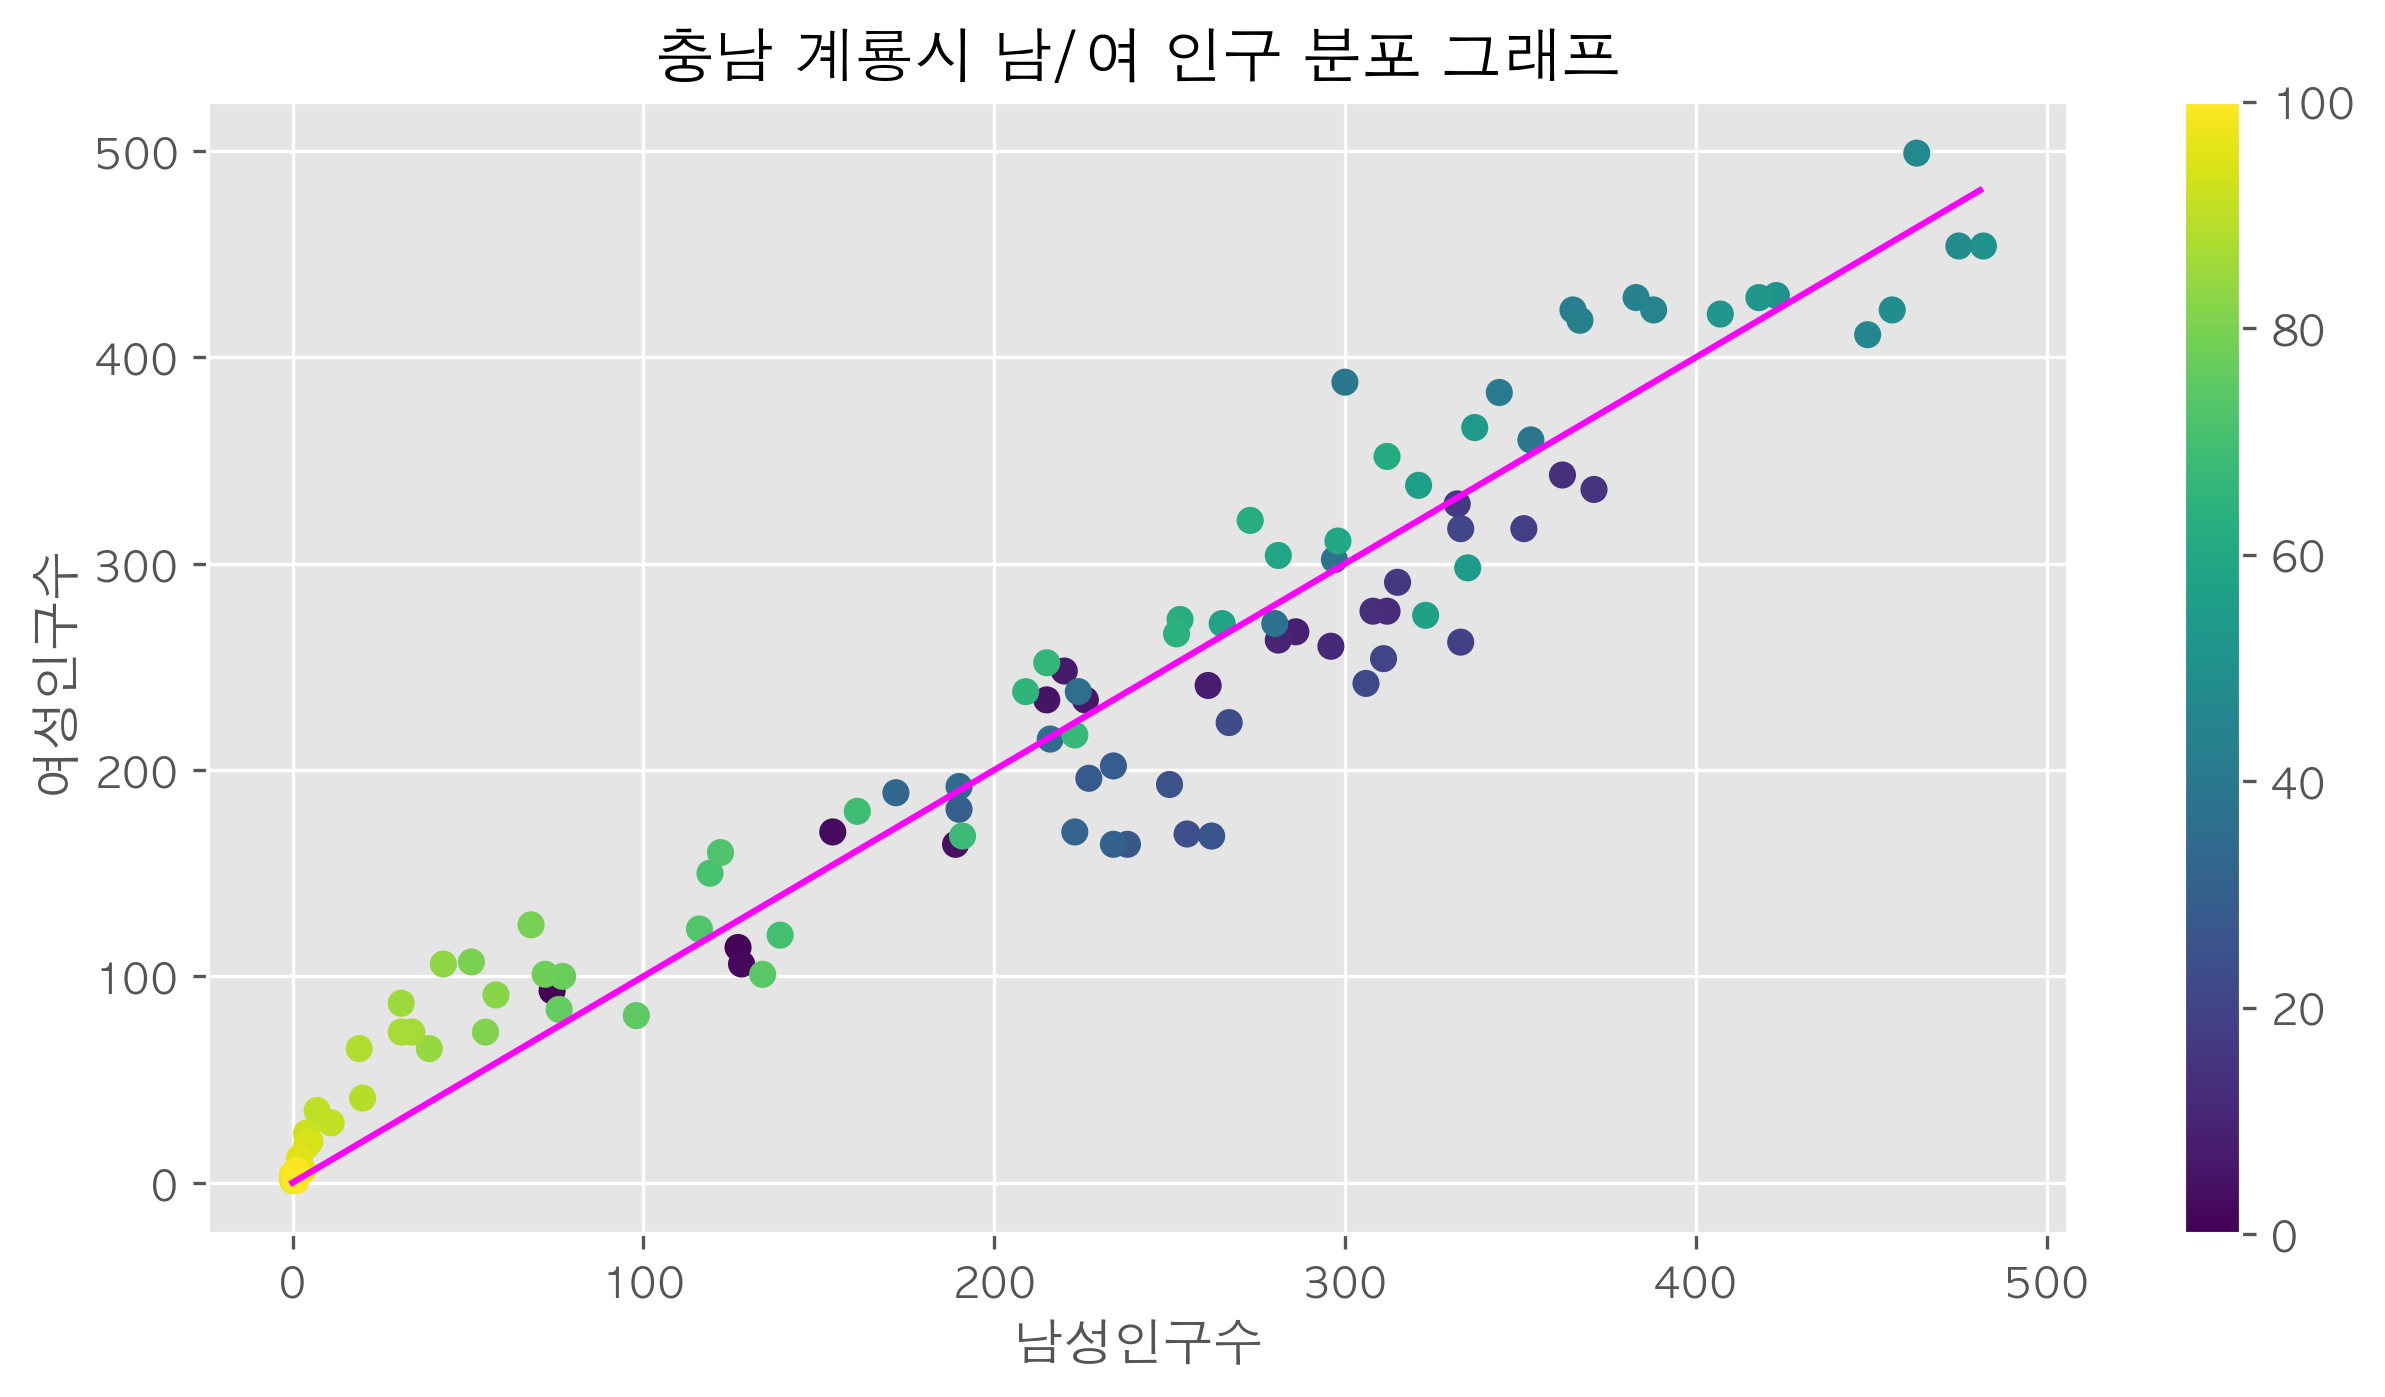

In [46]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize = (10,5), dpi = 300)

plt.title("충남 계룡시 남/여 인구 분포 그래프")
plt.scatter(df1_m.iloc[0], df1_f.iloc[0], c = df1_f.columns, alpha = 1, cmap = 'viridis')
plt.colorbar()
plt.plot(range(df1_m.iloc[0].max()), range(df1_m.iloc[0].max()), 'magenta')
plt.xlabel("남성인구수")
plt.ylabel("여성인구수")
plt.show()

여러개의 차트 출력하기

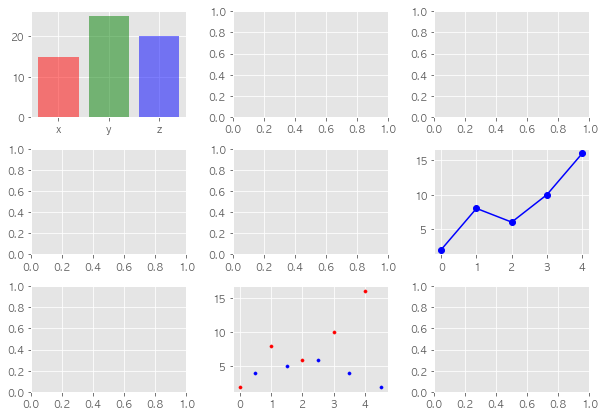

In [47]:
import matplotlib.pyplot as plt


f, axes = plt.subplots(3, 3)
# 격자의 크기 설정
f.set_size_inches((10, 7))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# [0,0] 위치에 막대그래프 출력
axes[0, 0].bar(["x", "y", "z"], [15, 25, 20], color = ['r', 'g', 'b'], alpha = 0.5)

# [1, 2] 위치에 선 그래프 출력
axes[1][2].plot(range(5), [2, 8, 6, 10, 16], color = "blue", marker = "o")

# [2, 1] 위치에 scatter 그래프 출력(색상이 다르게 해서 2개 출력)
axes[2, 1].scatter(range(5), [2, 8, 6, 10, 16], color = "red", s = 10)
axes[2, 1].scatter([0.5, 1.5, 2.5, 3.5, 4.5], [4, 5, 6, 4, 2], color = "blue", s = 10)

plt.show()

/Users/wondongchan/opt/anaconda3/envs/kdig/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


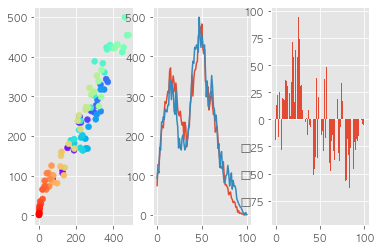

In [50]:
import matplotlib.pyplot as plt


plt.subplot(1, 3, 1)
plt.scatter(df1_m.iloc[0], df1_f.iloc[0], c = df1_f.columns, alpha = 1, cmap = 'rainbow')

plt.subplot(1, 3, 2)

plt.plot(df1_m.columns, df1_m.iloc[0], label = "남자")
plt.plot(df1_f.columns, df1_f.iloc[0], label = "여자")


plt.subplot(1, 3, 3)
plt.bar(mf_sub.columns, mf_sub.iloc[0])

plt.show()